<a href="https://colab.research.google.com/github/Gowri-Rk/Machine-Learning/blob/master/Colabs/Models/ML_KMeans_demo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#ds = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/Assignments/Assignment 1/Gowri/demographic.csv")

df_exams = pd.read_csv('/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/Datasets/Exam_Cleaned.csv', encoding='unicode_escape')

df_labs2 = pd.read_csv('/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/Datasets/Reduced_labs_cleaned.csv', encoding='unicode_escape')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ds = pd.merge(df_exams, df_labs2, on='SEQN', how='inner')

In [ ]:
ds

,Unnamed: 0_x,Unnamed: 0.1,SEQN,PEASCST1,PEASCTM1,BPXPLS,BPXPULS,BPXML1,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BMXWT,BMXHT,BMXBMI,BMDAVSAD,MGDEXSTS,Unnamed: 0_y,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,...,PHAFSTHR.y,PHAFSTMN.y,URXUIO,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,WTSH2YR.x,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,PHAFSTHR,PHAFSTMN,WTSA2YR.y,LBXTC,LBDTCSI,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,LBDB12,LBDB12SI
0,0,0,73557,1,620.0,86.000000,1.0,140.00000,122.000000,72.000000,114.00000,76.000000,102.00000,74.000000,78.3,171.3,26.7,20.600000,1.000000,0,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,524.0,386.7
1,1,1,73558,1,766.0,74.000000,1.0,170.00000,156.000000,62.000000,160.00000,80.000000,156.00000,42.000000,89.5,176.8,28.6,24.400000,1.000000,1,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49123.400015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,4.40,1.69,0.082,0.0,0.20,1.78,0.0,1.21,6.0,0.0,204.73,2.60,0.0,8.15,148.33,0.0,90.0,507.0,374.2
2,2,2,73559,1,665.0,68.000000,1.0,160.00000,140.000000,90.000000,140.00000,76.000000,146.00000,80.000000,88.9,175.3,28.9,25.600000,1.000000,2,11.9,11.9,113.0,9989.2,10.53,142196.890197,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,...,15.0,51.0,NaN,142196.890197,51.0,0.576,56.0,1.448,115794.742161,143745.934346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,51.0,NaN,126.0,3.26,1.45,0.070,0.0,0.22,1.96,0.0,1.27,6.3,0.0,209.64,2.66,0.0,9.57,174.17,0.0,66.0,732.0,540.2
3,3,3,73560,1,803.0,64.000000,1.0,130.00000,108.000000,38.000000,102.00000,34.000000,104.00000,38.000000,32.2,137.3,17.1,14.900000,1.000000,3,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,194.3,NaN,NaN,NaN,NaN,NaN,55766.512438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183653.604036,168.0,4.34,0.37,0.018,0.0,0.07,0.62,1.0,0.88,4.4,0.0,169.82,2.16,0.0,13.07,237.87,0.0,61.0,NaN,NaN
4,4,4,73561,1,949.0,92.000000,1.0,170.00000,136.000000,86.000000,134.00000,88.000000,142.00000,86.000000,52.0,162.4,19.7,21.114034,1.000000,4,255.0,255.0,147.0,12994.8,173.47,142266.006548,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,...,14.0,42.0,NaN,142266.006548,75.0,0.847,101.0,2.612,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.0,14.0,42.0,NaN,201.0,5.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,9808,9808,83727,1,611.0,60.000000,1.0,140.00000,110.000000,68.000000,116.00000,74.000000,112.00000,76.000000,71.8,171.3,24.5,19.100000,1.000000,9808,1.9,1.9,47.0,4154.8,4.04,67775.162806,0.88,4.9,49.0,75.0,27.0,26.0,13.0,4.64,25.0,10.0,2.500,195.0,5.043,103.0,...,14.0,30.0,NaN,67775.162806,81.0,0.914,119.0,3.077,NaN,73374.549189,108.0,5.995,0.0,2.0,108.0,106.0,1.0,14.0,30.0,NaN,190.0,4.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,720.0,531.4
9809,9809,9809,83728,1,124.0,74.416214,1.0,144.67364,118.123536,65.769939,118.23053,65.237954,117.99946,65.035637,11.3,84.4,15.9,21.114034,1.132433,9809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16512.138781,NaN,NaN,NaN

In [ ]:
ds = ds[['BMXBMI', 'LBDINSI']]

In [ ]:
ds.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ds

,BMXBMI,LBDINSI
2,28.9,34.98
4,19.7,36.72
7,35.7,89.46
10,20.3,23.10
15,22.8,36.30
...,...,...
9794,23.7,128.46
9795,28.1,76.98
9799,27.4,29.94
9804,33.1,184.26


In [ ]:
Xnp = ds.to_numpy()

In [ ]:
def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(Xnp, dtype=tf.float32), num_epochs=1)
  

In [ ]:
num_clusters = 5
kmeans = tf.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0qhjnsqt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd818aa0a20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0qhjnsqt/model.ckpt.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp0qhjnsqt/model.ckpt.
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-15T01:22:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0qhjnsqt/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-03-15-01:22:45
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 33737480.0, score = 33737480.0
INFO:tensorflow:Saving 'checkpoint_path' summary fo

In [ ]:
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
#for i, point in enumerate(Xnp):
for i in range(10):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', Xnp[i], 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0qhjnsqt/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
point: [28.9  34.98] is in cluster 0 centered at [24.151398 27.98315 ]
point: [19.7  36.72] is in cluster 0 centered at [24.151398 27.98315 ]
point: [35.7  89.46] is in cluster 1 centered at [ 31.065912 102.50548 ]
point: [20.3 23.1] is in cluster 0 centered at [24.151398 27.98315 ]
point: [22.8 36.3] is in cluster 0 centered at [24.151398 27.98315 ]
point: [23.2  36.84] is in cluster 0 centered at [24.151398 27.98315 ]
point: [28.9 96.9] is in cluster 1 centered at [ 31.065912 102.50548 ]
point: [35.9  65.52] is in cluster 2 centered at [27.263788 56.463287]
point: [23.6  36.48] is in cluster 0 centered at [24.151398 27.98315 ]
point: [ 38.7  126.66] is in cluster 1 centered at [ 31.065912 102.50548 ]


In [ ]:
from collections import Counter

print(Counter(cluster_indices))

Counter({2: 1066, 0: 1039, 1: 715, 4: 241, 3: 32})


In [ ]:
print(cluster_indices)
labels=cluster_indices
labels=np.asarray(labels)

[0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 4, 4, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 4, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 4, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 4, 4, 4, 0, 0, 0, 0, 2, 4, 1, 1, 2, 2, 0, 4, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 4, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 4, 2, 2, 2, 1, 4, 0, 2, 2, 4, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 4, 4, 1, 4, 0, 1, 1, 0, 0, 2, 2, 1, 3, 0, 0, 2, 0, 4, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 4, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 4, 1, 4, 4, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 4, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 4, 1, 1, 1, 0, 4, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 3, 4, 1, 

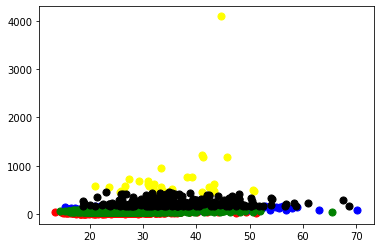

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(Xnp[labels==0, 0], Xnp[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(Xnp[labels==1, 0], Xnp[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(Xnp[labels==2, 0], Xnp[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(Xnp[labels==3, 0], Xnp[labels==3, 1], s=50, marker='o', color='yellow')
plt.scatter(Xnp[labels==4, 0], Xnp[labels==4, 1], s=50, marker='o', color='black')